# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [381]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Data Import

In [433]:
df = pd.read_csv('Wholesale_Data.csv')

In [434]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Descriptive Statistics

In [435]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Data Cleaning

In [436]:
##Checking Null Counts for Columns
df.info()
##Non-Null Counts match count from descriptive stats. Confirms no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### Data Visualization

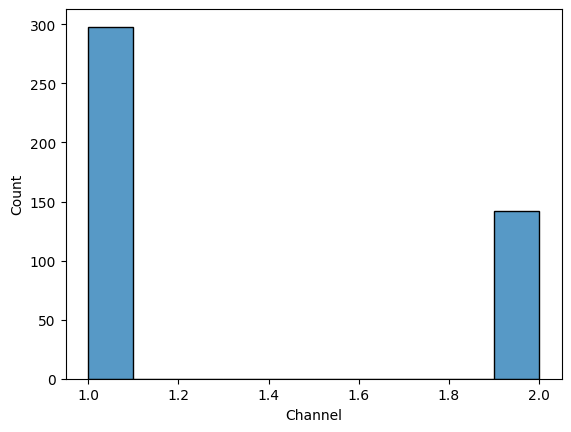

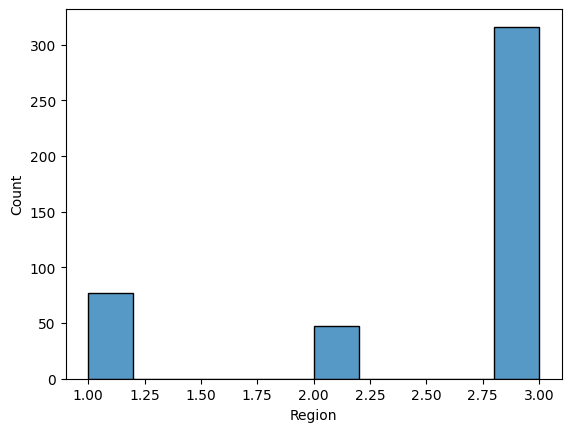

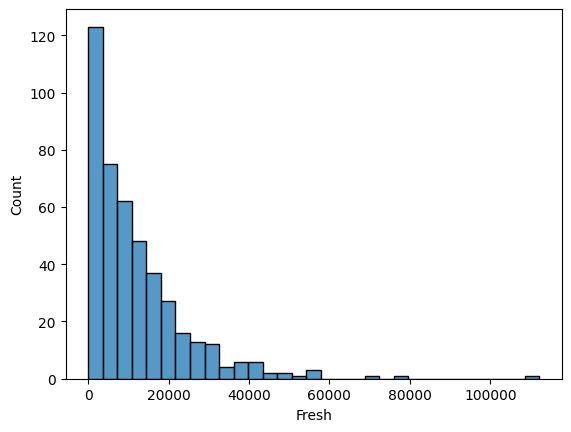

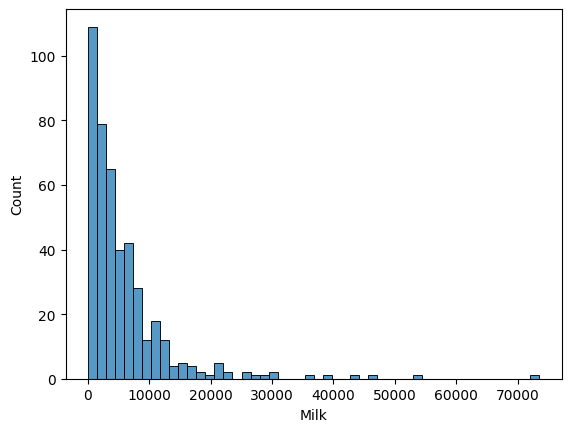

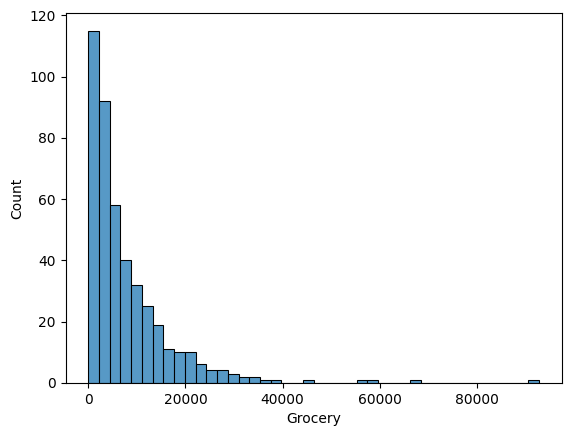

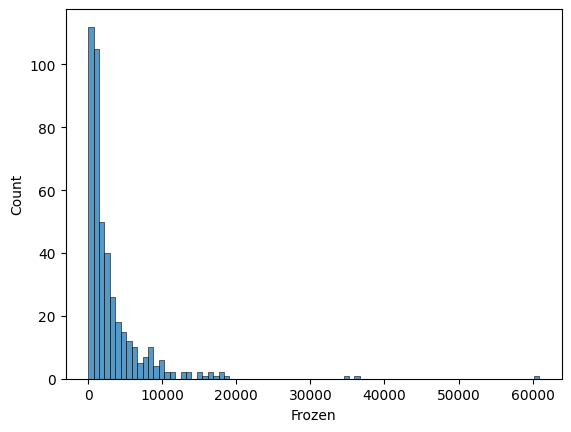

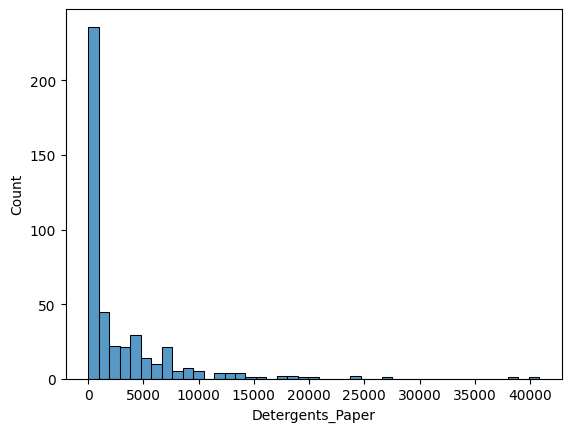

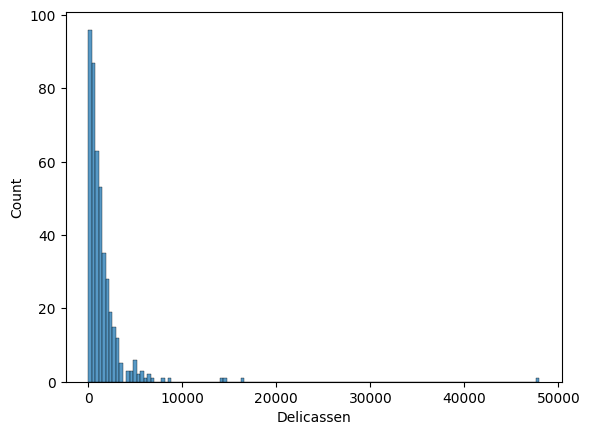

In [437]:
for column in df: 
    sns.histplot(df[column])
    plt.show()

### Based on histograms, Product Sale columns have outliers that are significantly far away from the left skewed data

### Outlier Detection

In [438]:
#Replacing Outliers with Median.
zscore = stats.zscore(df, axis=0).abs()
zcolumns = ['Channel_Z','Region_Z','Fresh_Z', 'Milk_Z','Grocery_Z','Frozen_Z','Detergent_Paper_Z','Delicassen_Z']
zscore.columns = zcolumns



In [439]:
df_z = pd.concat([df,zscore],axis=1)

In [440]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Channel            440 non-null    int64  
 1   Region             440 non-null    int64  
 2   Fresh              440 non-null    int64  
 3   Milk               440 non-null    int64  
 4   Grocery            440 non-null    int64  
 5   Frozen             440 non-null    int64  
 6   Detergents_Paper   440 non-null    int64  
 7   Delicassen         440 non-null    int64  
 8   Channel_Z          440 non-null    float64
 9   Region_Z           440 non-null    float64
 10  Fresh_Z            440 non-null    float64
 11  Milk_Z             440 non-null    float64
 12  Grocery_Z          440 non-null    float64
 13  Frozen_Z           440 non-null    float64
 14  Detergent_Paper_Z  440 non-null    float64
 15  Delicassen_Z       440 non-null    float64
dtypes: float64(8), int64(8)
me

In [441]:
df_z[(df_z['Fresh_Z']>3) | (df_z['Milk_Z']>3) | (df_z['Grocery_Z']>3) | (df_z['Frozen_Z']>3) | (df_z['Detergent_Paper_Z']>3) | (df_z['Delicassen_Z']>3)]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Z,Region_Z,Fresh_Z,Milk_Z,Grocery_Z,Frozen_Z,Detergent_Paper_Z,Delicassen_Z
23,2,3,26373,36423,22019,5154,4337,16523,1.448652,0.590668,1.137716,4.154476,1.482005,0.429367,0.305623,5.324340
39,1,3,56159,555,902,10002,212,2916,0.690297,0.590668,3.495518,0.710971,0.742627,1.429129,0.560531,0.493851
47,2,3,44466,54259,55571,7782,24171,6465,1.448652,0.590668,2.569923,6.573905,5.016638,0.971318,4.470300,1.753747
56,2,3,4098,29892,26866,2616,17740,1340,1.448652,0.590668,0.625531,3.268554,1.992626,0.094023,3.119940,0.065629
61,2,3,35942,38369,59598,3254,26701,2017,1.448652,0.590668,1.895179,4.418448,5.440874,0.037546,5.001541,0.174706
65,2,3,85,20959,45828,36,24231,1423,1.448652,0.590668,0.943192,2.056805,3.990233,0.626075,4.482899,0.036164
71,1,3,18291,1266,21042,5373,4173,14472,0.690297,0.590668,0.497960,0.614525,1.379080,0.474530,0.271186,4.596234
85,2,3,16117,46197,92780,1026,40827,2944,1.448652,0.590668,0.325870,5.480306,8.936528,0.421915,7.967672,0.503791
86,2,3,22925,73498,32114,987,20070,903,1.448652,0.590668,0.864778,9.183650,2.545492,0.429958,3.609186,0.220764
87,1,3,43265,5025,8117,6312,1579,14351,0.690297,0.590668,2.474854,0.104621,0.017459,0.668172,0.273493,4.553279


In [442]:
df_z['Milk'].median()

3627.0

In [443]:
## Replacing Outliers (based on z scores> 3 (abs value) with medians
df_z.loc[df_z['Fresh_Z']>3,'Fresh']=df_z['Fresh'].median()
df_z.loc[df_z['Milk_Z']>3,'Milk']=df_z['Milk'].median()
df_z.loc[df_z['Grocery_Z']>3,'Grocery']=df_z['Grocery'].median()
df_z.loc[df_z['Frozen_Z']>3,'Frozen']=df_z['Frozen'].median()
df_z.loc[df_z['Detergent_Paper_Z']>3,'Detergents_Paper']=df_z['Detergents_Paper'].median()
df_z.loc[df_z['Delicassen_Z']>3,'Delicassen']=df_z['Delicassen'].median()

C:\Users\naims\AppData\Local\Temp\ipykernel_33660\3080027136.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4755.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_z.loc[df_z['Grocery_Z']>3,'Grocery']=df_z['Grocery'].median()
C:\Users\naims\AppData\Local\Temp\ipykernel_33660\3080027136.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '816.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_z.loc[df_z['Detergent_Paper_Z']>3,'Detergents_Paper']=df_z['Detergents_Paper'].median()
C:\Users\naims\AppData\Local\Temp\ipykernel_33660\3080027136.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '965.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  

In [444]:
df_z.drop(['Channel_Z','Region_Z','Fresh_Z','Milk_Z', 'Grocery_Z', 'Frozen_Z', 'Detergent_Paper_Z','Delicassen_Z'],axis=1,inplace=True)

In [445]:
df_z.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405,3516.0,7844.0
3,1,3,13265,1196,4221.0,6404,507.0,1788.0
4,2,3,22615,5410,7198.0,3915,1777.0,5185.0


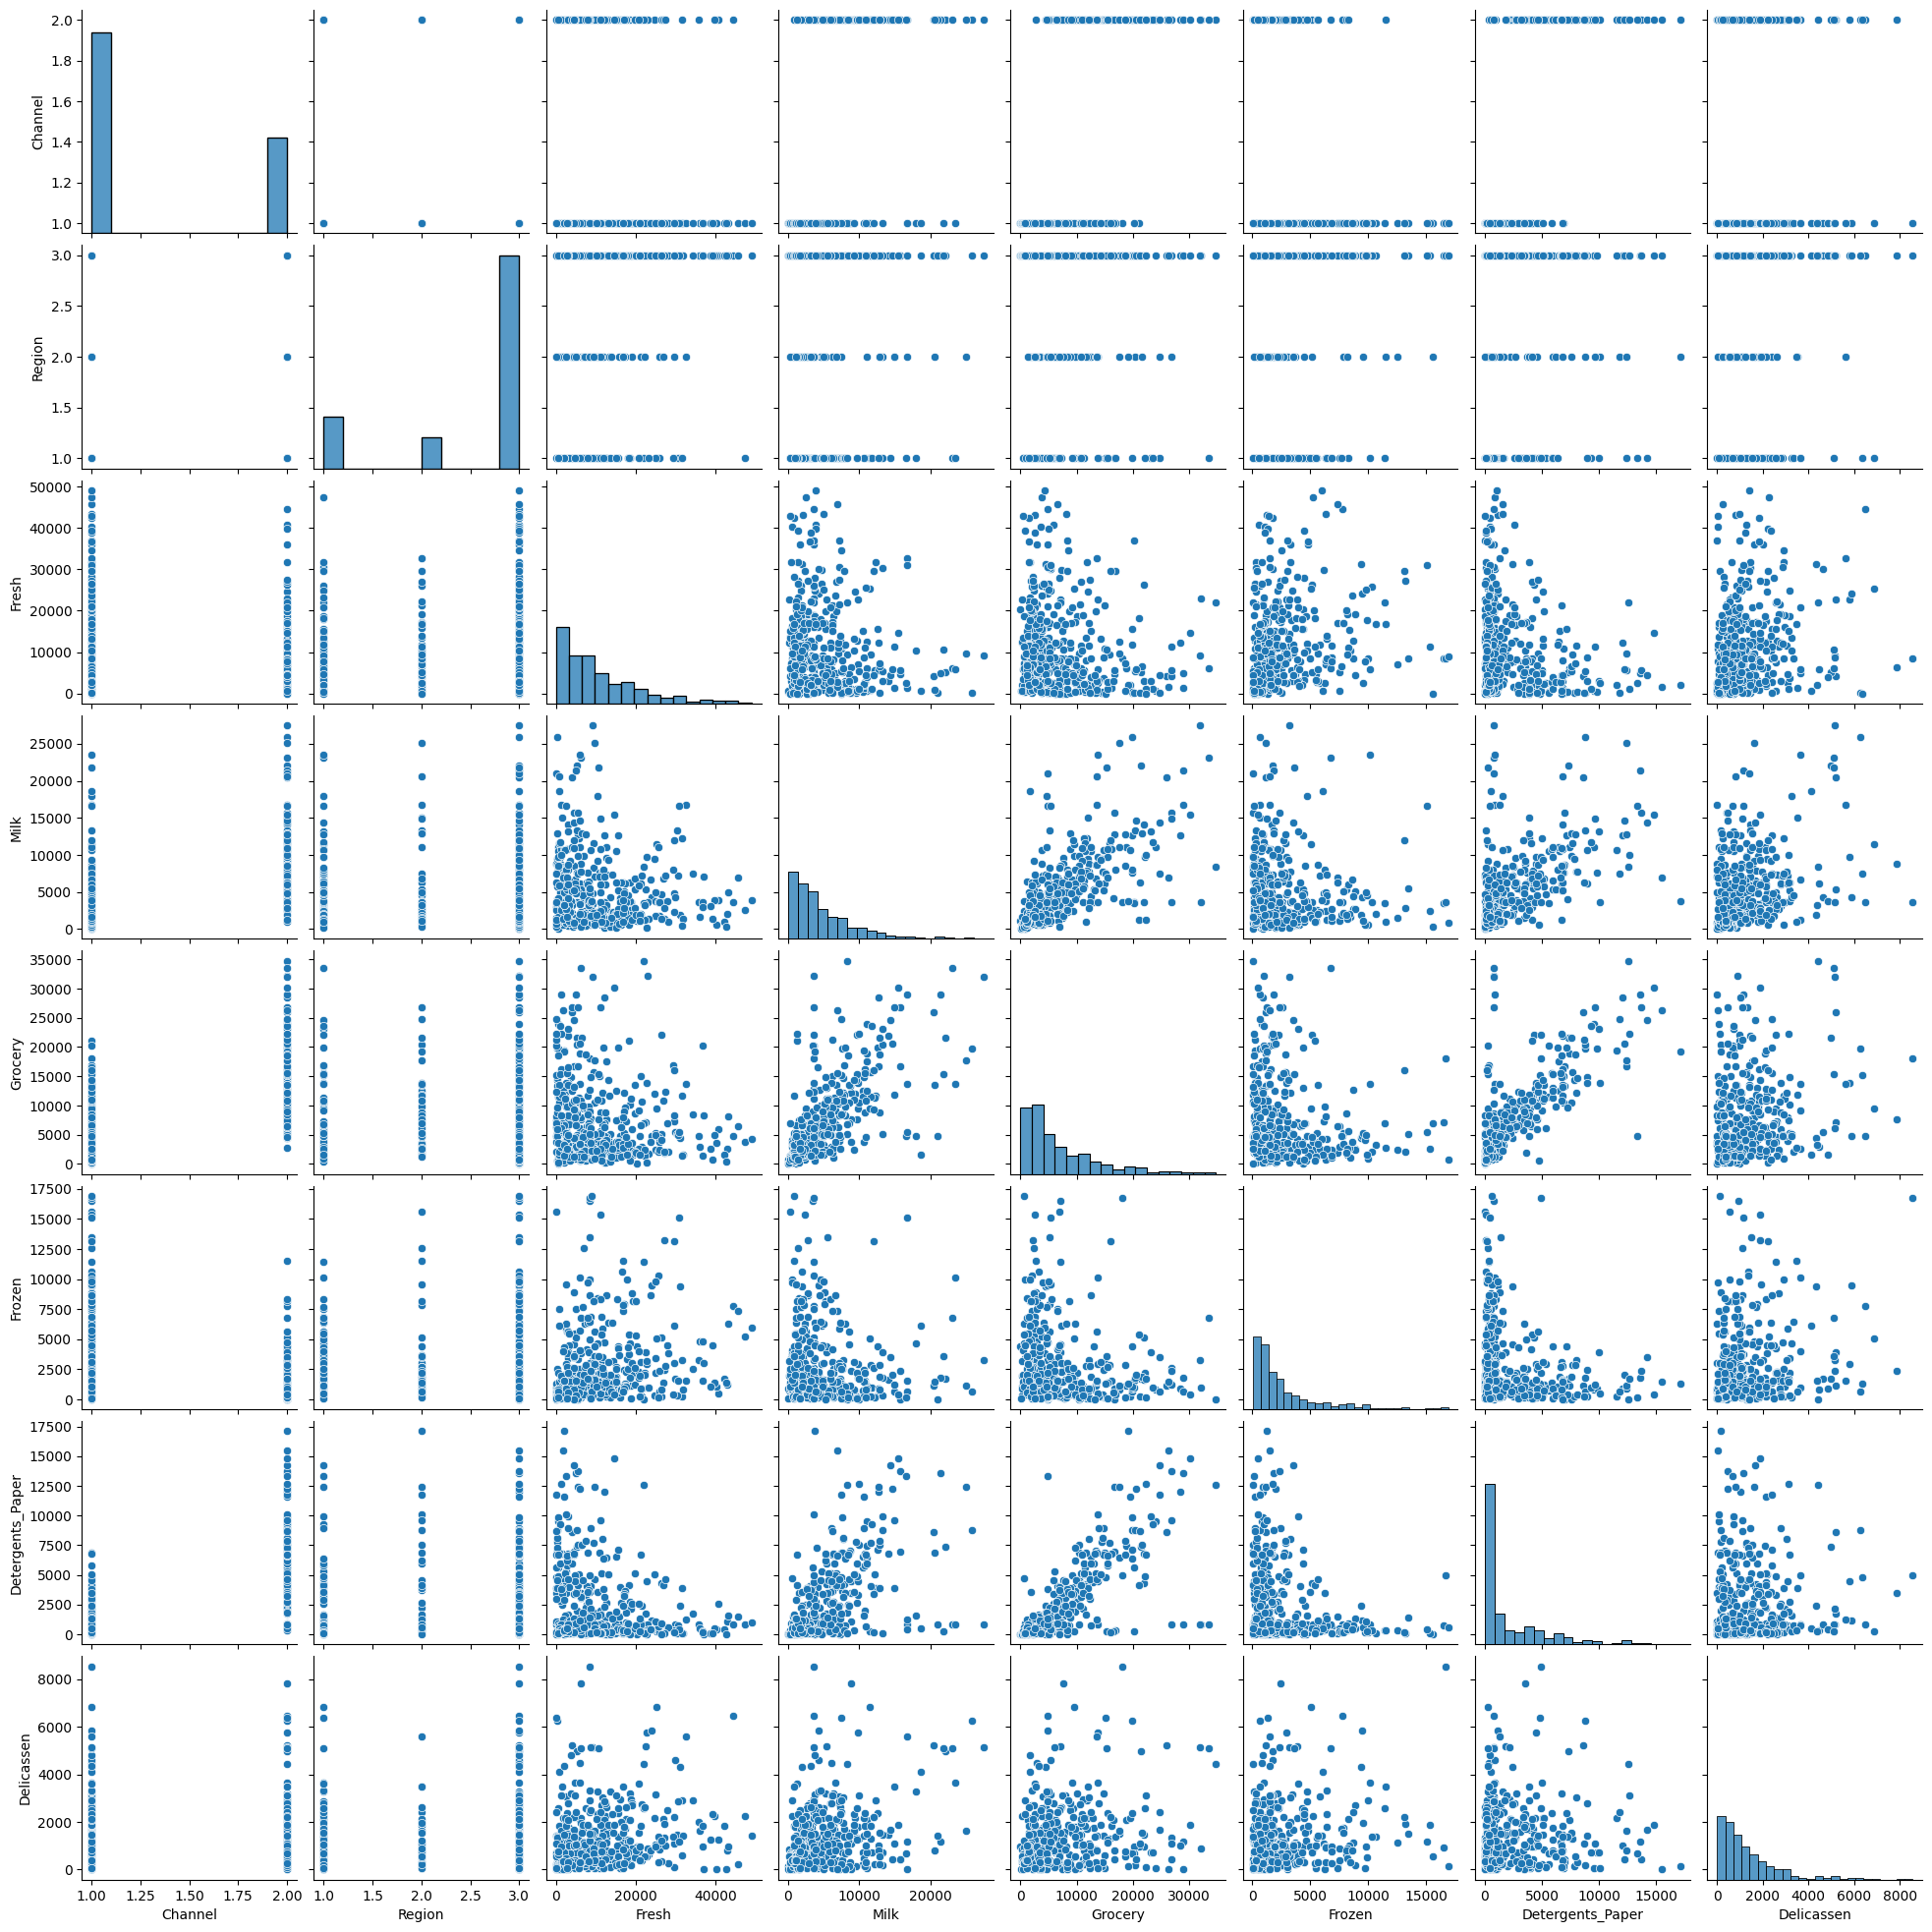

In [446]:
sns.pairplot(df_z)

### After removing outliers, the distributions for indivual variables (histograms) confirm mostly left skewed data meaning most products are being sold at lower amounts. Groceries to Detergents_Paper appear to have a linear relationship. Grocery also has a linear relationship with milk. 

### Correlation Analysis

<Axes: >

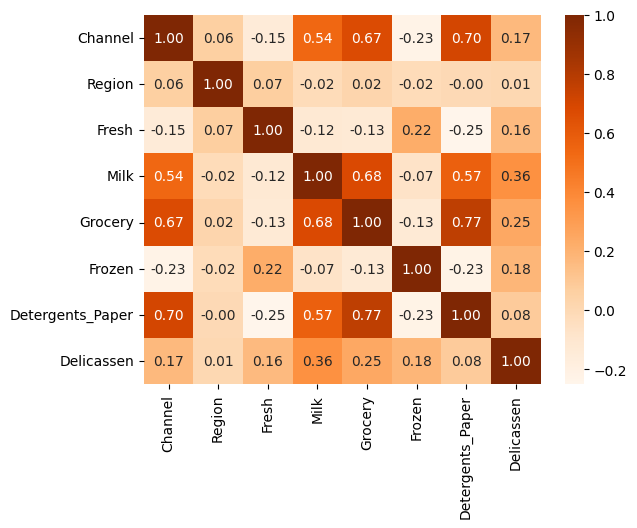

In [448]:
sns.heatmap(df_z.corr(), annot=True, cmap='Oranges', fmt=".2f")


### Disregarding Channel and Region since these are categorical columns, the two highest correlations are between Grocery to Detergent (0.77) and Grocery to Milk (0.68) which confirm the positive linear relationship seen in the scatter plots. Detergent to Milk can also be potentially considered as a medium level positive correlation with 0.57.The remaining variables have weak correlationship between each other as they are all less than 0.5. 

### Data Transformation

In [400]:
#Because data doesn't have normal distrubtion, will use MinMaxScaler to perform normalization on the continuous data 

In [449]:
selected_columns = ['Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
df_z[selected_columns]
#Dropping Categorical Columns

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561.0,214,2674.0,1338.0
1,7057,9810,9568.0,1762,3293.0,1776.0
2,6353,8808,7684.0,2405,3516.0,7844.0
3,13265,1196,4221.0,6404,507.0,1788.0
4,22615,5410,7198.0,3915,1777.0,5185.0
...,...,...,...,...,...,...
435,29703,12051,16027.0,13135,182.0,2204.0
436,39228,1431,764.0,4510,93.0,2346.0
437,14531,15488,30243.0,437,14841.0,1867.0
438,10290,1981,2232.0,1038,168.0,2125.0


In [450]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df_z[selected_columns])
df_mms = mms.transform(df_z[selected_columns])

In [451]:
scaled_df = pd.DataFrame(df_mms)

In [452]:
scaled_df.columns = selected_columns

In [453]:
scaled_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.225117,0.180566,0.204693,0.156428,0.136222,0.154280
std,0.206306,0.174118,0.196462,0.181367,0.185811,0.154218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063692,0.053908,0.061801,0.042456,0.014824,0.047414
50%,0.172982,0.130156,0.136588,0.088582,0.047424,0.112525
75%,0.329739,0.247748,0.287318,0.198547,0.207411,0.207558
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Part II - KMeans Clustering

In [454]:
from sklearn.cluster import KMeans

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [455]:
X = scaled_df.values

In [458]:
## Function for Elbow Method
def plot_distortion(X,max_clusters = 15):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=45)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

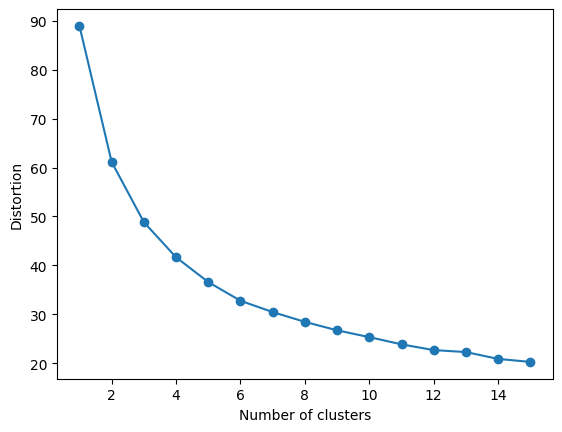

In [457]:
#Plot Elbow Method
plot_distortion(X,max_clusters=15)

### 4-6 is where the number of clusters stops reducing distortion at significant enough amounts

In [466]:
# Fit the model
km = KMeans(n_clusters=4, #based on elbow rule 
            n_init=10, 
            random_state=45)

# fit and predict
y_km = km.fit_predict(X)

In [467]:
#Plotting Cluster Function
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

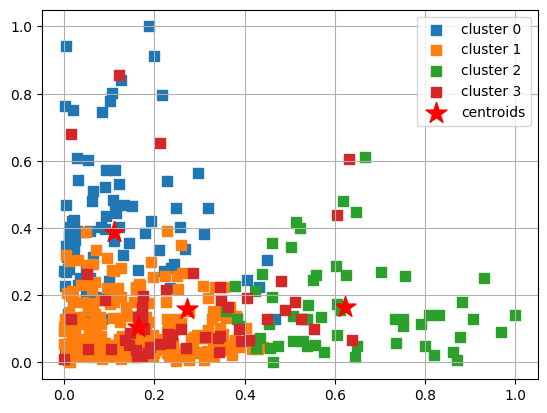

In [468]:
#Plot Clusters
plot_clusters(X, y_km, plt_cluster_centers= True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [461]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

c:\Users\naims\anaconda3\envs\main_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


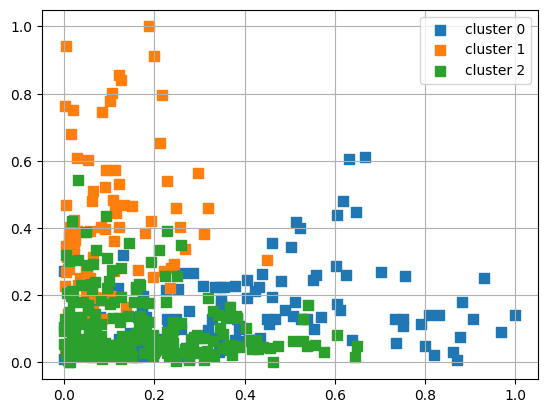

In [462]:
#Fit clustering
y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

In [463]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

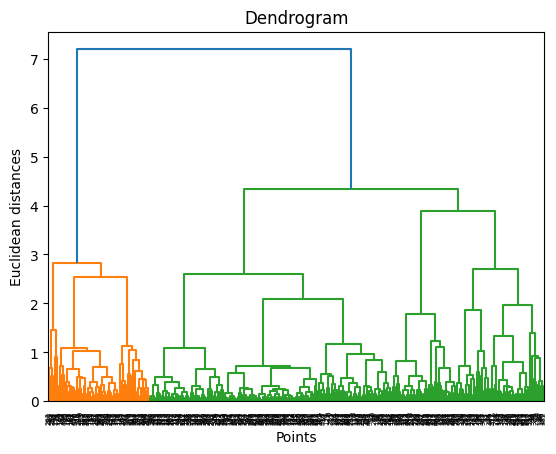

In [464]:
plot_dendrogram(X)

### 4 is the ideal amount of clusters

c:\Users\naims\anaconda3\envs\main_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


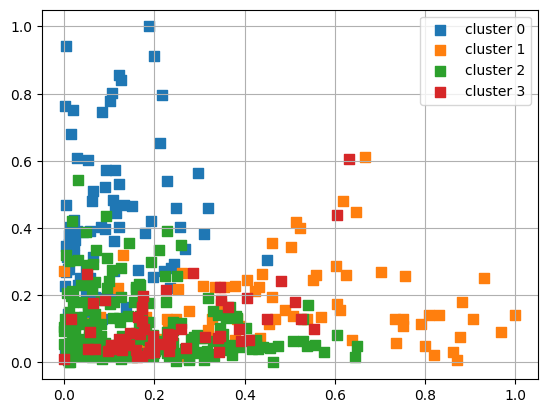

In [465]:
## Replotting with 4 clusters
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 4)

y_hc = ac.fit_predict(X)
plot_clusters(X,y_hc)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

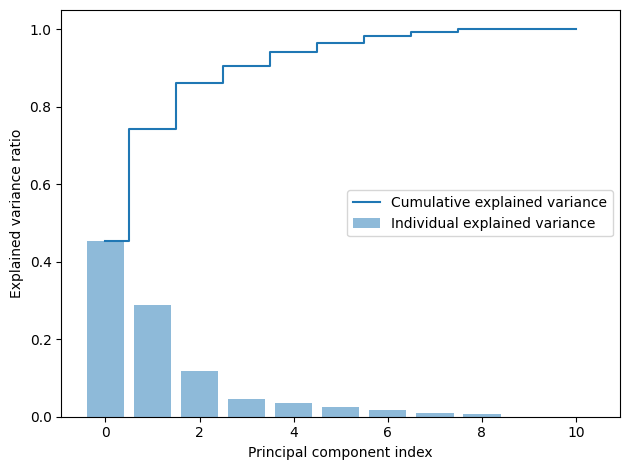

In [299]:
from sklearn.decomposition import PCA

pca = PCA()

df_pca = pca.fit_transform(df_clean)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [300]:
##PCA appears to be optimal 4

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### 
- PCA Indicates that 4 variables would cover at least 90% of the variance which means you can reduce the features down from 6. 
- Both models operate better with less clusters
- The two highest correlations are between Grocery to Detergent (0.77) and Grocery to Milk (0.68) which confirm the positive linear relationship seen in the scatter plots. 
- Both models were able to find clusters for high sale extremes and split clusters for values in low sale corner  